In [14]:
from skimage import io, color, data
from skimage.transform import radon, iradon
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(
/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:328: UserWarning: sun_1.jpg is a low contrast image
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:328: UserWarning: sun_5.jpg is a low contrast image
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:328: UserWarning: sun_10.jpg is a low contrast image
  return func(*args, **kwargs)


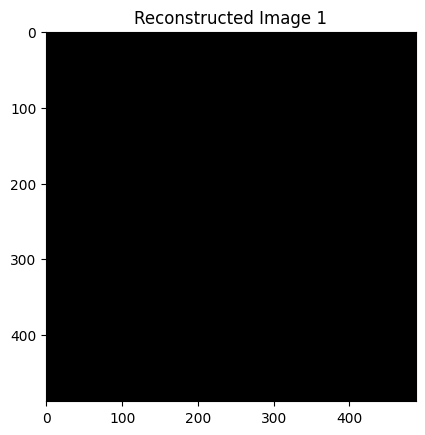

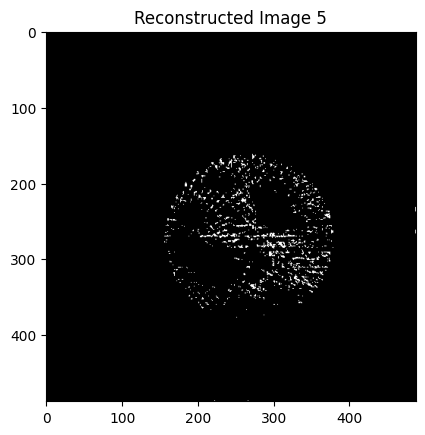

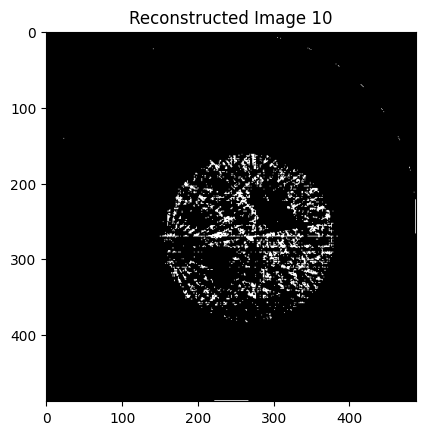

In [23]:
im = io.imread('sun.jpg')

im = color.rgb2gray(im)

# Normalize to [0,1]
im = im.astype(float)/255.0

# Radon Transform
theta_1 = np.arange(0, 180, 1) # Angles in degrees
theta_5 = np.arange(0, 180, 5)
theta_10 = np.arange(0, 180, 10)

sinogram_1 = radon(im, theta=theta_1)
sinogram_5 = radon(im, theta=theta_5)
sinogram_10 = radon(im, theta=theta_10)

# Inverse Radon Transform
reconstructed_1 = iradon(sinogram_1, theta=theta_1, filter_name='ramp')
reconstructed_5 = iradon(sinogram_5, theta=theta_5, filter_name='ramp')
reconstructed_10 = iradon(sinogram_10, theta=theta_10, filter_name='ramp')

# Convert to uint8 before saving. Note that this step will round to nearest integer values.
reconstructed_1 = (reconstructed_1 * 255).astype(np.uint8)  # Scale and convert to uint8
reconstructed_5 = (reconstructed_5 * 255).astype(np.uint8)  # Scale and convert to uint8
reconstructed_10 = (reconstructed_10 * 255).astype(np.uint8)  # Scale and convert to uint8

# Save the reconstructed image
io.imsave('sun_1.jpg', reconstructed_1)
io.imsave('sun_5.jpg', reconstructed_5)
io.imsave('sun_10.jpg', reconstructed_10)

plt.imshow(reconstructed_1, cmap='gray')
plt.title('Reconstructed Image 1')
plt.show()

plt.imshow(reconstructed_5, cmap='gray')
plt.title('Reconstructed Image 5')
plt.show()

plt.imshow(reconstructed_10, cmap='gray')
plt.title('Reconstructed Image 10')
plt.show()
